Assignment 2

Fajri Sofianto

Link Data : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

Guna menghitung statistik dari data tersebut


In [2]:
import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import uniform

from datetime import datetime

class color:      # untuk warna teks penjelasan grafik
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
df = pd.read_csv('D:\File_Analisa_Python/nycrollingsales.csv')      #insert file from local drive


## Change anomaly values
df['SALE PRICE'] = df['SALE PRICE'].replace(' -  ',0).astype(float) #replace - (dash) to zero and convert it to float

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])                   #convert SALE DATE to Datetime

df = df.rename(columns={'Unnamed: 0': 'KEY'})                       #rename column Unnamed 0 to KEY

df['YEAR BUILT'] = df['YEAR BUILT'].replace(0,1900)
df['YEAR BUILT'] = df['YEAR BUILT'].replace(1111,1900)              #change year built from 0 to 1900 and 1111 to 1900

df['EASE-MENT'] = df['EASE-MENT'].replace(' ','-')                  #fill column Ease-ment with - (dash)

df.describe()

,KEY,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1945.965227,1.657485,1.056623e+06
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,35.537798,0.819341,1.038794e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1680.000000,1.000000,0.000000e+00
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,4.150000e+05
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,8.300000e+05
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


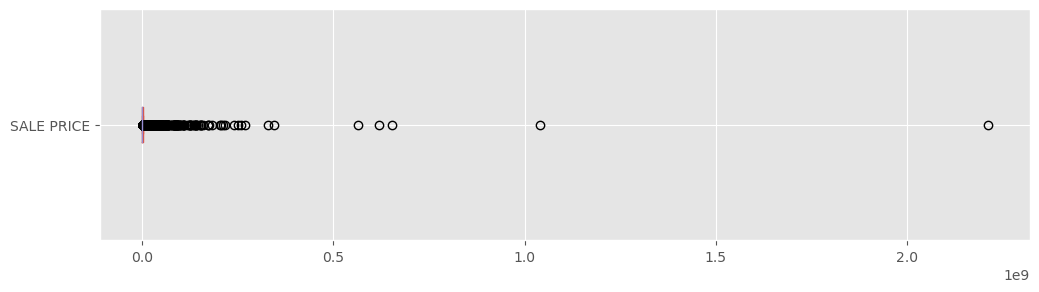

Rata - rata harga jual 1494927.31 dolar
Nilai tengah 625500.0 dolar
Nilai Modus 10.0 dolar
Outliers terlihat sangat banyak

ModeResult(mode=array([10.]), count=array([766]))


In [4]:
df[df['BUILDING CLASS AT PRESENT'] != df['BUILDING CLASS AT TIME OF SALE']] # Cek Jenis Bangunan yang dijual berbeda dari Jenis Awalnya

df_sale = df[df['SALE PRICE'] != 0]             #Menurut informasi, data harga jual dengan nilai 0 dolar merupakan transaksi balik nama, dan orang tua kasih ke anak (warisan)
                                                #exclude bangunan yang diwariskan / balik nama (harga jual = 0 dolar)

plt.style.use('ggplot')
df_sale['SALE PRICE'].plot(kind='box', vert=False, figsize=(12,3))
plt.show()

mean_sale = df_sale['SALE PRICE'].mean()                        #Menghitung Rata - rata
median_sale = df_sale['SALE PRICE'].median()                    #Menghitung Nilai tengah
mode_sale = statistics.mode(df_sale['SALE PRICE'])              #Menghitung Modus
hmean_sale = statistics.harmonic_mean(df_sale['SALE PRICE'])    #Menghitung Harmonic Mean
max_sale = df_sale['SALE PRICE'].max()                          #Menghitung Nilai Maksimal
min_sale = df_sale['SALE PRICE'].min()                          #Menghitung Nilai Minimal
modus_sale = scipy.stats.mode(df_sale['SALE PRICE'], axis=None, keepdims=True)  #Menghitung Nilai Modus menggunakan Scipy

print('Rata - rata harga jual',round(mean_sale,2),'dolar')
print('Nilai tengah',median_sale,'dolar')
print('Nilai Modus',mode_sale, 'dolar')
print('Outliers terlihat sangat banyak')
print('')
print(modus_sale)

In [5]:
df_sale[df_sale['SALE PRICE'] <= 50000].count()       #cek harga jual bangunan dibawah 100 dolar

print(color.UNDERLINE+color.GREEN+'setelah dicek lebih lanjut, ternyata terdapat 23.327 dari 59.759 data dimana harga jual bangunan dibawah 500ribu dolar dan merupakan harga yang tidak wajar'+color.END)
print('')

print('''dari hasil diatas, pengujian nilai rata - rata perlu menggunakan perhitungan Harmonic Mean dimana terdapat data outliers yang besar sedangkan data modus hanya 10 dolar
menurut https://www.propertyshark.com/mason/market-trends/residential/nyc-all menyebutkan harga rata - rata penjualan property NYC di 740ribu dolar''')
print('')
print('kesimpulan dari harga penjualan bangunan di NYC pada tahun 2016 - 2017 masih terdapat anomali dengan harga rata - rata harga penjualan sebesar',round(hmean_sale,2),'''dolar
sedangkan nilai tengah dari harga penjualan tersebut adalah sebesar''',median_sale,'''dolar dan setelah mengeluarkan harga penjualan bangunan yang 0 (gratis), ternyata masih terdapat 
harga jual bangunan sebesar 1 dolar dengan harga penjualan frekuensi terbanyak (modus) sebesar''',mode_sale,'dolar dengan jumlah 766 kali')

setelah dicek lebih lanjut, ternyata terdapat 23.327 dari 59.759 data dimana harga jual bangunan dibawah 500ribu dolar dan merupakan harga yang tidak wajar

dari hasil diatas, pengujian nilai rata - rata perlu menggunakan perhitungan Harmonic Mean dimana terdapat data outliers yang besar sedangkan data modus hanya 10 dolar
menurut https://www.propertyshark.com/mason/market-trends/residential/nyc-all menyebutkan harga rata - rata penjualan property NYC di 740ribu dolar

kesimpulan dari harga penjualan bangunan di NYC pada tahun 2016 - 2017 masih terdapat anomali dengan harga rata - rata harga penjualan sebesar 278.37 dolar
sedangkan nilai tengah dari harga penjualan tersebut adalah sebesar 625500.0 dolar dan setelah mengeluarkan harga penjualan bangunan yang 0 (gratis), ternyata masih terdapat 
harga jual bangunan sebesar 1 dolar dengan harga penjualan frekuensi terbanyak (modus) sebesar 10.0 dolar dengan jumlah 766 kali


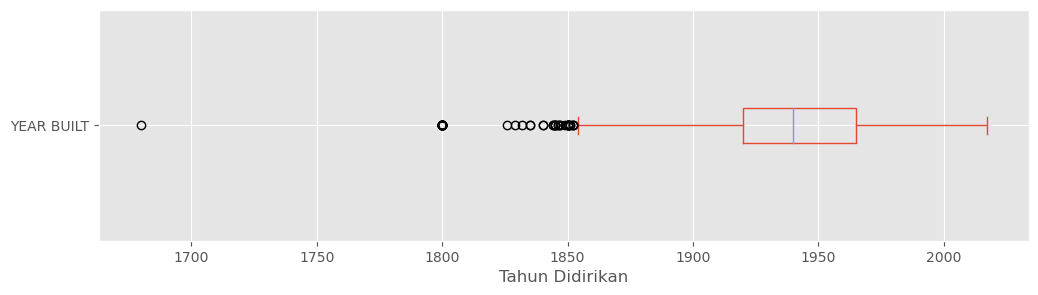

Rentang waktu bangunan didirikan pada data ini yaitu 337 tahun dimana bangunan paling tua didirikan dari tahun 1680 dan bangunan yg paling muda di tahun 2017
Varian tahun properti didirikan di NYC sebesar 1262.92
Dengan nilai standar deviasi sebesar 35.54
Nilai Skewness = 0.45 (positif) artinya data tersebut banyak properti yang didirikan di tahun muda sehingga membentuk distribusi positif
Nilai Kurtosis = -0.69 (negatif) dimana nilai kurtosis negatif yaitu distribusi kurang memuncak daripada distribusi normal
25% data property dibangun dibawah tahun 1920.0
50% data property dibangun di tahun 1940.0
75% data property dibangun di tahun 1965.0


In [20]:
build_max = df['YEAR BUILT'].max()
build_min = df['YEAR BUILT'].min()

df_year = df[['YEAR BUILT']]

df_year.plot(kind='box', vert=False, figsize=(12,3))
plt.xlabel('Tahun Didirikan')
plt.show()

range = build_max - build_min                   #periksa rentang waktu property dibangun
var = df['YEAR BUILT'].var(ddof=0)              #periksa variance populasi
stdeviation = df['YEAR BUILT'].std(ddof=0)      #periksa standar deviasi populasi
skew = df['YEAR BUILT'].skew()
kurt = df['YEAR BUILT'].kurtosis()


print('Rentang waktu bangunan didirikan pada data ini yaitu',range,'tahun', 'dimana bangunan paling tua didirikan dari tahun', build_min, 'dan bangunan yg paling muda di tahun', build_max )
print('Varian tahun properti didirikan di NYC sebesar',round(var,2))
print('Dengan nilai standar deviasi sebesar',round(stdeviation,2))
print('Nilai Skewness =',round(skew,2),'(positif) artinya data tersebut banyak properti yang didirikan di tahun muda sehingga membentuk distribusi positif')
print('Nilai Kurtosis =',round(kurt,2),'(negatif) dimana nilai kurtosis negatif yaitu distribusi kurang memuncak daripada distribusi normal')
print('========================================================================')
print('25% data property dibangun dibawah tahun',df['YEAR BUILT'].quantile(0.25))
print('50% data property dibangun di tahun',df['YEAR BUILT'].quantile(0.5))
print('75% data property dibangun di tahun',df['YEAR BUILT'].quantile(0.75))


In [30]:
cor_year_price = df['YEAR BUILT'].corr(df_sale['SALE PRICE'])

print('Nilai korelasi R hampir mendekati 0 (',cor_year_price,')yang dapat diartikan bahwa tidak ada hubungannya antara tahun didirikan bangunan dengan harga jual bangunan di NYC')

Nilai korelasi R hampir mendekati 0 ( 1.3613831804292158e-05 )yang dapat diartikan bahwa tidak ada hubungannya antara tahun didirikan bangunan dengan harga jual bangunan di NYC


<Axes: xlabel='YEAR BUILT', ylabel='SALE PRICE'>

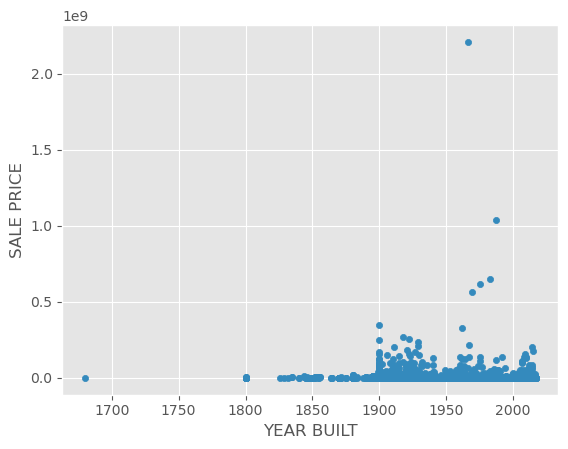

In [59]:
df.plot(kind='scatter', x='YEAR BUILT', y='SALE PRICE')

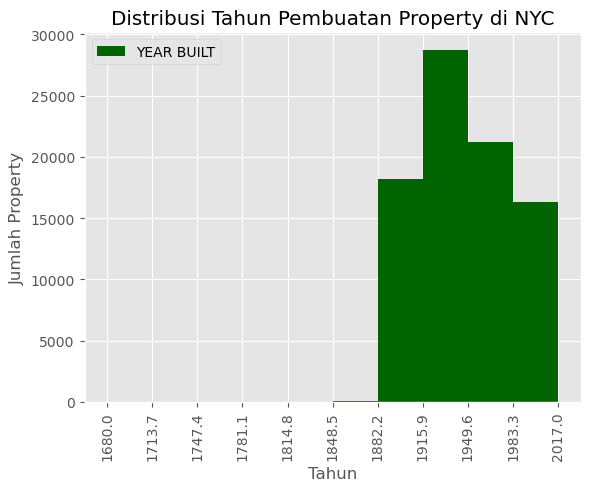

In [56]:
plt.style.use('ggplot')

jumlah_bins = 10

freq, bin_edges = np.histogram(df_year, bins=jumlah_bins)

df_year.plot(kind="hist", bins=jumlah_bins, rot=90, color='darkgreen')

plt.xticks(bin_edges)

plt.title("Distribusi Tahun Pembuatan Property di NYC")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Property")

plt.show()